In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U --no-cache-dir gdown --pre

In [ ]:
! gdown --id 1fTcdO6MLbyEWisc8nEPB-PU0c3JZXkNX
! gdown --id 1ZH20aLJ8DSjj8m_QoSlzwbgR3ZSdBqma

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv('/content/train_set.csv')
X_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values

mean = np.mean(y_train)
std = np.std(y_train)
print(mean, std)
y_train = (y_train-mean)/std

df1 = pd.read_csv('/content/test_set.csv')
X_test = df1.iloc[:,:-1].values
y_test = df1.iloc[:,-1].values
y_test = (y_test-mean)/std

26405859.32287897 20036724.59027255


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14922, 356)
(14922,)
(3730, 356)
(3730,)


In [ ]:
print(y_test)

[ 0.81820462  0.97791136 -0.9335787  ... -0.52433018  0.07457011
  0.15442348]


In [ ]:
# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(units=256, input_dim=356))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model.add(keras.layers.Dense(units=128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model.add(keras.layers.Dense(units=1))
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.MeanAbsoluteError())

In [ ]:
min = np.min(history.history['val_loss'][-100:])
odd = True
learning_rate=1e-5
reduce = False
while(1):
  history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))
  if odd:
    model.save_weights('/content/drive/MyDrive/Project Data Science/data/not using images/weights1.h5')
  else:
    model.save_weights('/content/drive/MyDrive/Project Data Science/data/not using images/weights0.h5')
  odd = not odd
  x = np.min(history.history['val_loss'][-100:])
  if x > min:
    if reduce:
      break
    reduce = True
    learning_rate = learning_rate/2
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.MeanAbsoluteError())
    continue
  min = x
  reduce = False

In [ ]:
print(learning_rate)

5e-06


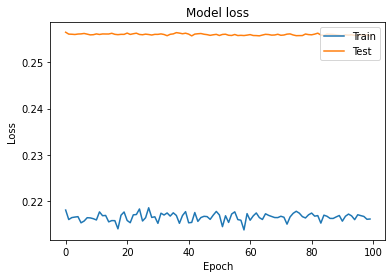

In [ ]:
plt.plot(history.history['loss'][-100:])
plt.plot(history.history['val_loss'][-100:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()